
# Análise Exploratória de Dados (EDA) - Base de Dados PEDE 2024
**Datathon 2024**

Este notebook analisa os dados educacionais dos anos de 2022, 2023 e 2024 para preparar a modelagem de Machine Learning.
O objetivo é entender a qualidade dos dados, distribuições, correlações e a evolução do indicador principal: **INDE** (Índice de Desenvolvimento Educacional).
Focada na qualidade dos dados e panorama geral dos indicadores educacionais por ano


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuração para melhor visualização
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
%matplotlib inline



## 1. Carregamento dos Dados
Carregando o arquivo Excel e suas abas específicas.


In [2]:

# Ajuste o caminho conforme necessário. Se rodar na pasta 'notebooks', o arquivo está em '../'
file_path = '../BASE DE DADOS PEDE 2024 - DATATHON.xlsx'

if not os.path.exists(file_path):
    # Tenta caminho absoluto ou local se o notebook for movido
    # Se estiver rodando na raiz do projeto
    file_path = 'BASE DE DADOS PEDE 2024 - DATATHON.xlsx'

try:
    xls = pd.ExcelFile(file_path)
    print(f"Abas Disponíveis: {xls.sheet_names}")
    
    df_2022 = pd.read_excel(xls, 'PEDE2022')
    df_2023 = pd.read_excel(xls, 'PEDE2023')
    df_2024 = pd.read_excel(xls, 'PEDE2024')
    
    print("Dados carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar dados: {e}")


Abas Disponíveis: ['PEDE2022', 'PEDE2023', 'PEDE2024']
Dados carregados com sucesso!



## 1.1 Limpeza Inicial de Dados
Correção de tipos de dados e tratamento de valores não numéricos (ex: "INCLUIR") nas colunas de indicadores.


In [3]:

# Função para limpar colunas numéricas que podem ter texto misturado
def clean_numeric_columns(df, columns):
    for col in columns:
        if col in df.columns:
            # Coerce erros para NaN (transforma 'INCLUIR' em NaN)
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Colunas de interesse para conversão (INDE e Indicadores)
target_cols_2022 = ['INDE 22', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IPP', 'Matem', 'Portug', 'Inglês']
target_cols_2023 = ['INDE 2023', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IPP', 'Mat', 'Por', 'Ing']
target_cols_2024 = ['INDE 2024', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IPP', 'Mat', 'Por', 'Ing']

# Aplicando a limpeza
print("Limpando colunas numéricas...")
df_2022 = clean_numeric_columns(df_2022, target_cols_2022)
df_2023 = clean_numeric_columns(df_2023, target_cols_2023)
df_2024 = clean_numeric_columns(df_2024, target_cols_2024)

print("Limpeza concluída. Valores não numéricos convertidos para NaN.")


Limpando colunas numéricas...
Limpeza concluída. Valores não numéricos convertidos para NaN.



## 2. Visão Geral dos Dados
Verificando dimensões, colunas e tipos de dados.


In [4]:

def analyze_dataframe(df, name):
    print(f"--- {name} ---")
    print(f"Dimensões (Shape): {df.shape}")
    print(f"Linhas Duplicadas: {df.duplicated().sum()}")
    print("-" * 30)

analyze_dataframe(df_2022, "PEDE 2022")
analyze_dataframe(df_2023, "PEDE 2023")
analyze_dataframe(df_2024, "PEDE 2024")

# Exibir as primeiras linhas de 2024 para verificar
df_2024.head()


--- PEDE 2022 ---
Dimensões (Shape): (860, 42)
Linhas Duplicadas: 0
------------------------------
--- PEDE 2023 ---
Dimensões (Shape): (1014, 48)
Linhas Duplicadas: 0
------------------------------
--- PEDE 2024 ---
Dimensões (Shape): (1156, 50)
Linhas Duplicadas: 0
------------------------------


,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,8.666667,6.26,5.625,NaN,8.0,10.0,6.0,NaN,NaN,NaN,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,9.333333,3.76,7.500,NaN,8.0,10.0,6.0,NaN,NaN,NaN,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.952200,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,9.083333,3.76,7.500,NaN,8.0,10.0,6.0,NaN,NaN,NaN,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,Pública,NaN,NaN,NaN,Topázio,NaN,8.63895,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,8.002,9.750000,3.76,6.875,NaN,7.0,8.0,6.0,NaN,NaN,NaN,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.444200,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,9.002,4.166667,3.76,5.000,NaN,7.5,8.0,7.0,NaN,NaN,NaN,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando



## 3. Análise de Valores Ausentes
Visualizando e quantificando dados ausentes.


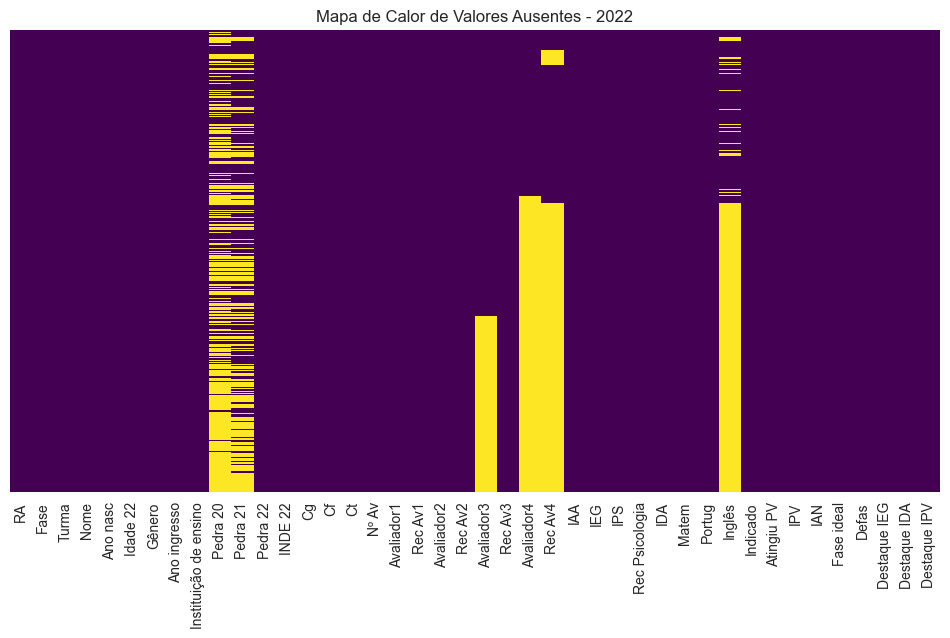

Top 10 Colunas com Valores Ausentes em 2022 (%):
Inglês        67.093023
Rec Av4       65.581395
Avaliador4    63.953488
Pedra 20      62.441860
Pedra 21      46.279070
Avaliador3    37.906977
Matem          0.232558
Portug         0.232558
dtype: float64




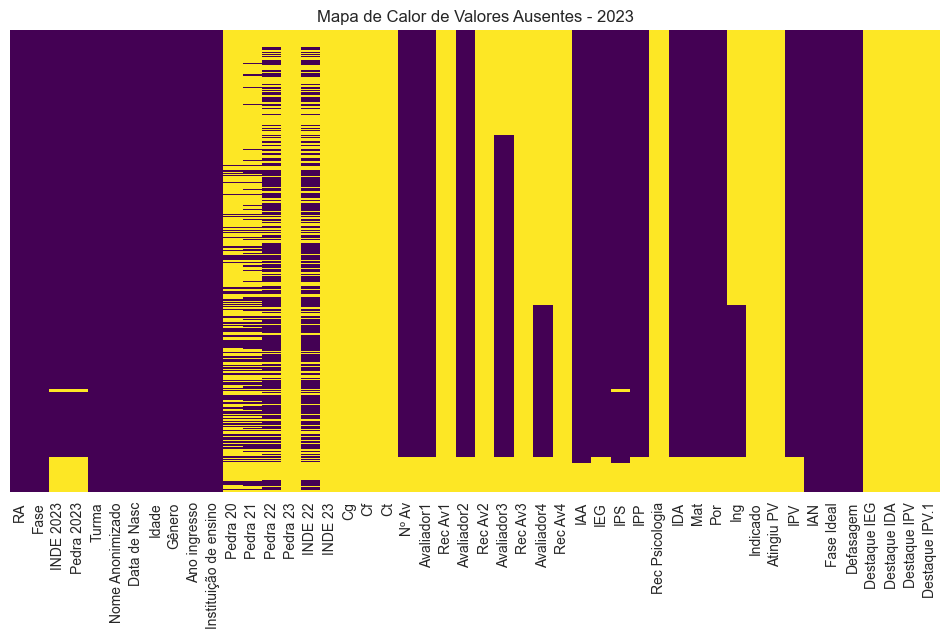

Top 10 Colunas com Valores Ausentes em 2023 (%):
Cg              100.0
Cf              100.0
INDE 23         100.0
Pedra 23        100.0
Rec Av3         100.0
Atingiu PV      100.0
Indicado        100.0
Destaque IEG    100.0
Ct              100.0
Rec Av4         100.0
dtype: float64




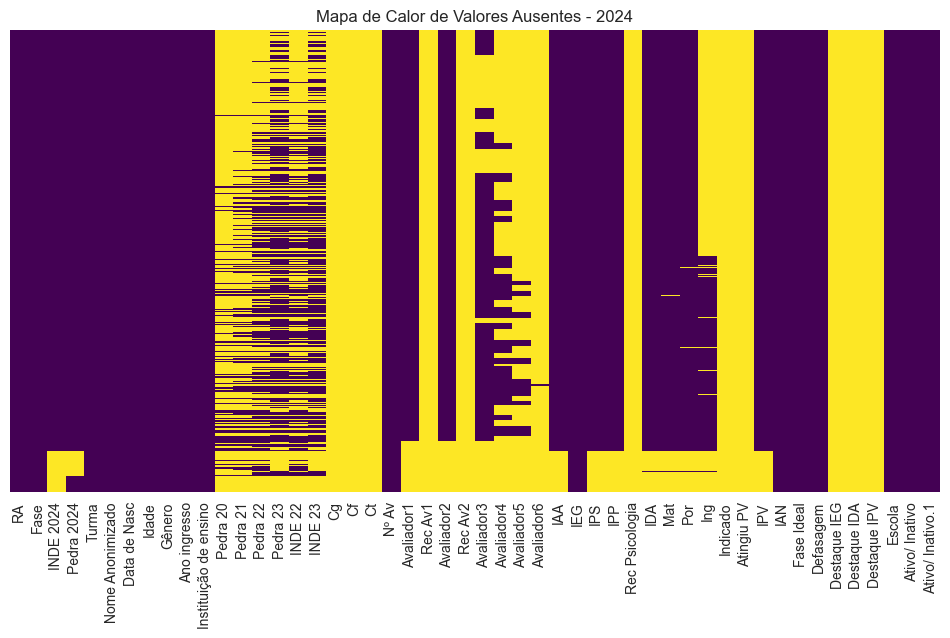

Top 10 Colunas com Valores Ausentes em 2024 (%):
Rec Av1         100.0
Cf              100.0
Cg              100.0
Destaque IPV    100.0
Destaque IEG    100.0
Indicado        100.0
Ct              100.0
Rec Av2         100.0
Atingiu PV      100.0
Destaque IDA    100.0
dtype: float64




In [5]:

def plot_missing_values(df, year):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title(f'Mapa de Calor de Valores Ausentes - {year}')
    plt.show()
    
    # Calcular porcentagem
    missing_percent = df.isnull().sum() * 100 / len(df)
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    if not missing_percent.empty:
        print(f"Top 10 Colunas com Valores Ausentes em {year} (%):")
        print(missing_percent.head(10))
    else:
        print(f"Sem valores ausentes em {year}")
    print("\n")

plot_missing_values(df_2022, "2022")
plot_missing_values(df_2023, "2023")
plot_missing_values(df_2024, "2024")



## 4. Análise da Variável Alvo (INDE)
O **INDE** é a métrica principal de interesse. Vamos olhar sua distribuição ao longo dos anos.


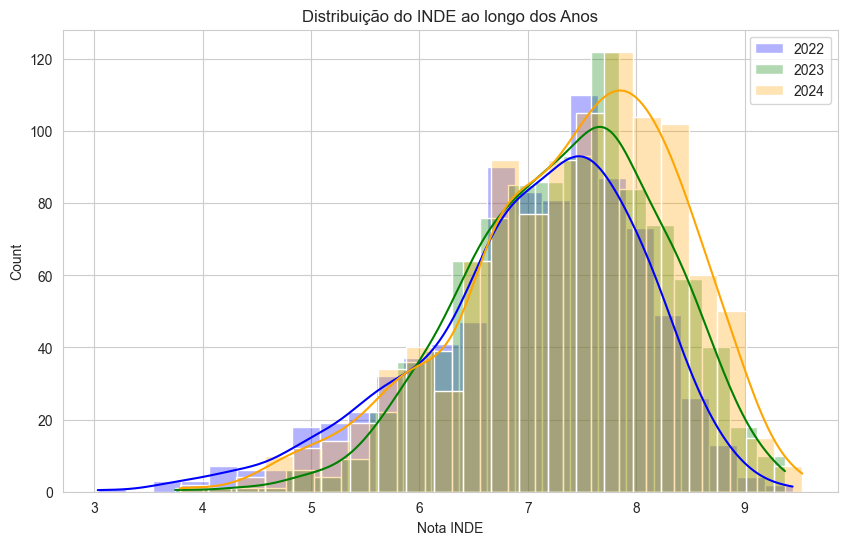

Estatísticas do INDE:
2022:
 count    860.000000
mean       7.036176
std        1.017773
min        3.032000
25%        6.485500
50%        7.197000
75%        7.751250
max        9.442000
Name: INDE 22, dtype: float64

2023:
 count    931.000000
mean       7.342309
std        0.901757
min        3.745542
25%        6.724150
50%        7.408033
75%        7.996083
max        9.371200
Name: INDE 2023, dtype: float64

2024:
 count    1054.000000
mean        7.396686
std         1.013915
min         3.789478
25%         6.768097
50%         7.540041
75%         8.139550
max         9.531325
Name: INDE 2024, dtype: float64


In [6]:

# Padronizando nomes de colunas para o INDE se estiverem ligeiramente diferentes
# 2022: 'INDE 22'
# 2023: 'INDE 2023'
# 2024: 'INDE 2024'

inde_cols = {
    '2022': 'INDE 22',
    '2023': 'INDE 2023',
    '2024': 'INDE 2024'
}

plt.figure(figsize=(10, 6))
# Verifica se as colunas existem antes de plotar para evitar erros
if inde_cols['2022'] in df_2022.columns:
    sns.histplot(df_2022[inde_cols['2022']].dropna(), kde=True, label='2022', color='blue', alpha=0.3)
if inde_cols['2023'] in df_2023.columns:
    sns.histplot(df_2023[inde_cols['2023']].dropna(), kde=True, label='2023', color='green', alpha=0.3)
if inde_cols['2024'] in df_2024.columns:
    sns.histplot(df_2024[inde_cols['2024']].dropna(), kde=True, label='2024', color='orange', alpha=0.3)

plt.title('Distribuição do INDE ao longo dos Anos')
plt.xlabel('Nota INDE')
plt.legend()
plt.show()

print("Estatísticas do INDE:")
if inde_cols['2022'] in df_2022.columns:
    print("2022:\n", df_2022[inde_cols['2022']].describe())
if inde_cols['2023'] in df_2023.columns:
    print("\n2023:\n", df_2023[inde_cols['2023']].describe())
if inde_cols['2024'] in df_2024.columns:
    print("\n2024:\n", df_2024[inde_cols['2024']].describe())



## 5. Correlações
Analisando como dimensões específicas (IAA, IEG, IPS, IDA, IPV, IPP) se correlacionam com o INDE final.


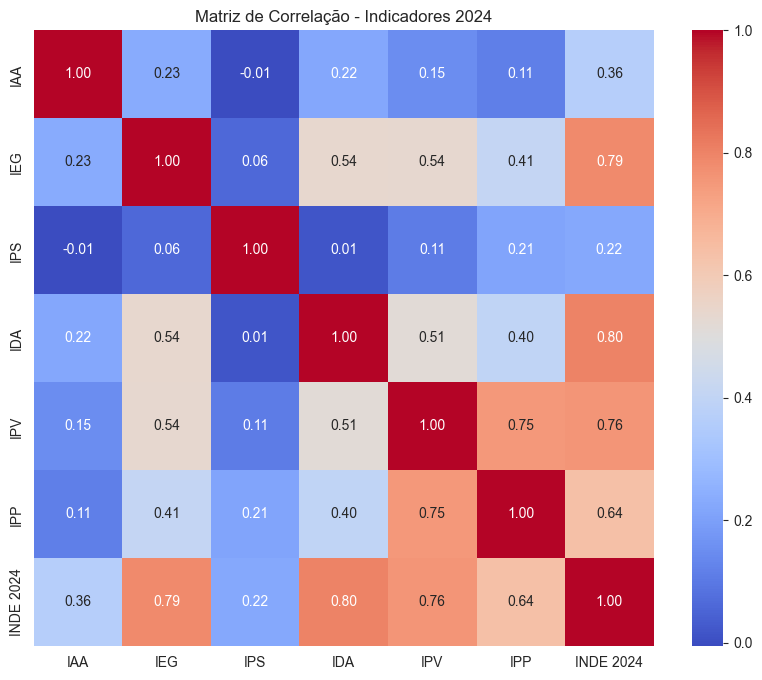

In [7]:

# Foco em 2024 para as correlações mais recentes
# Adicionado IPP que estava faltando
indicators = ['IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IPP', 'INDE 2024']

# Filtrar apenas colunas que existem no dataframe
existing_indicators = [col for col in indicators if col in df_2024.columns]

plt.figure(figsize=(10, 8))
corr_matrix = df_2024[existing_indicators].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Indicadores 2024')
plt.show()



## 6. Análise Categórica
Desempenho (INDE) por Fase e Gênero.


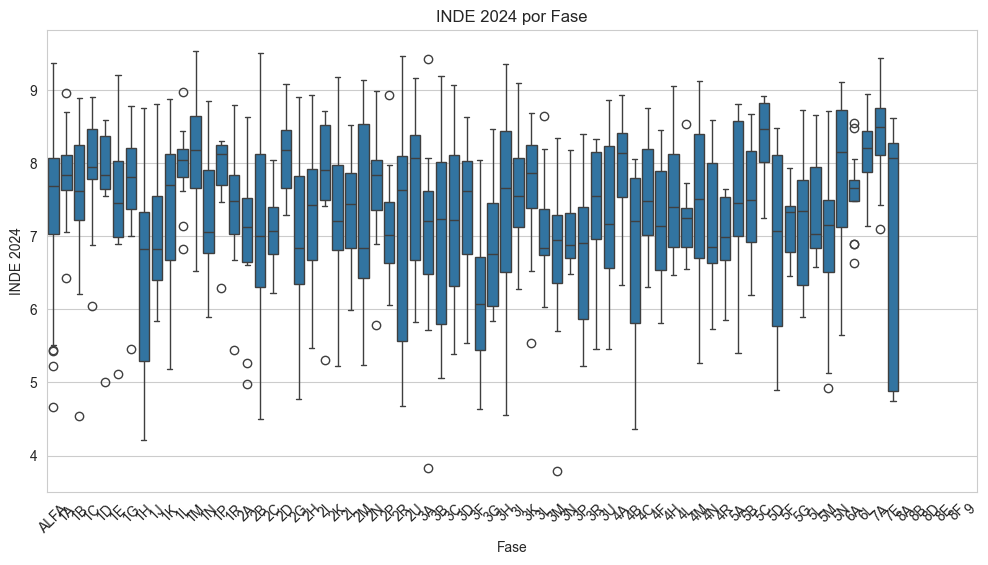

C:\Users\manoe\AppData\Local\Temp\ipykernel_13880\1456986108.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=gender_col, y='INDE 2024', data=df_2024, palette="Set2")


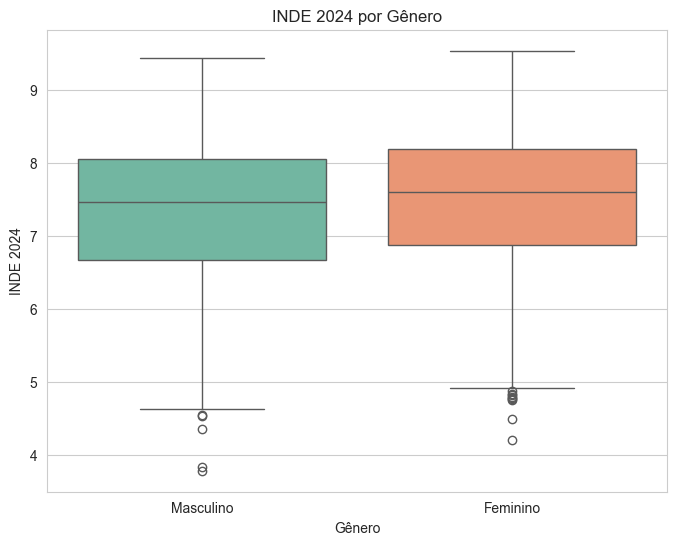

In [8]:

# Por Fase
if 'Fase' in df_2024.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Fase', y='INDE 2024', data=df_2024)
    plt.xticks(rotation=45)
    plt.title('INDE 2024 por Fase')
    plt.show()

# Por Gênero
# Nota: Verificar nome da coluna de Gênero (geralmente 'Gênero')
gender_col = 'Gênero'
if gender_col in df_2024.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=gender_col, y='INDE 2024', data=df_2024, palette="Set2")
    plt.title('INDE 2024 por Gênero')
    plt.show()



## 7. Análise Longitudinal (Evolução)
Acompanhando alunos que aparecem em múltiplos anos. A junção é feita pelo 'RA' (ID do Aluno).


Número de alunos presentes em ambos 2023 e 2024: 765


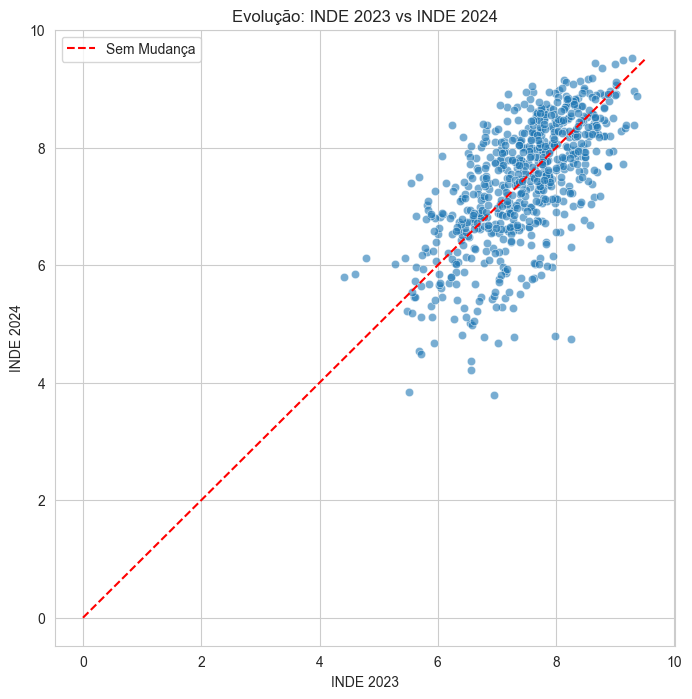

Estatísticas de Melhoria:
count    678.000000
mean      -0.050061
std        0.820079
min       -3.516367
25%       -0.495845
50%        0.009798
75%        0.531134
max        2.142133
Name: Melhoria, dtype: float64


In [9]:

# Padronizar RA para string para garantir junção correta
# Removendo espaços em branco extras se houver
df_2023['RA'] = df_2023['RA'].astype(str).str.strip()
df_2024['RA'] = df_2024['RA'].astype(str).str.strip()

# Merge 2023 e 2024 (Inner Join)
# Verificar se as colunas de INDE existem antes do merge
cols_2023 = ['RA', 'INDE 2023'] if 'INDE 2023' in df_2023.columns else ['RA']
cols_2024 = ['RA', 'INDE 2024'] if 'INDE 2024' in df_2024.columns else ['RA']

# Se as colunas existirem, faz o merge
if 'INDE 2023' in df_2023.columns and 'INDE 2024' in df_2024.columns:
    df_merged = pd.merge(df_2023[cols_2023], df_2024[cols_2024], on='RA', how='inner')
    
    print(f"Número de alunos presentes em ambos 2023 e 2024: {len(df_merged)}")
    
    if not df_merged.empty:
        # Plotar evolução
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x='INDE 2023', y='INDE 2024', data=df_merged, alpha=0.6)
        
        # Linha diagonal de referência (sem mudança)
        max_val = max(df_merged['INDE 2023'].max(), df_merged['INDE 2024'].max())
        plt.plot([0, max_val], [0, max_val], 'r--', label='Sem Mudança')
        
        plt.title('Evolução: INDE 2023 vs INDE 2024')
        plt.legend()
        plt.show()
        
        # Calcular melhoria
        df_merged['Melhoria'] = df_merged['INDE 2024'] - df_merged['INDE 2023']
        print("Estatísticas de Melhoria:")
        print(df_merged['Melhoria'].describe())
    else:
        print("A fusão resultou em 0 alunos.")
else:
    print("Colunas de INDE não encontradas para realizar a fusão correta.")
    print(f"Colunas 2023: {df_2023.columns}")
    print(f"Colunas 2024: {df_2024.columns}")
